
=========== RANDOM FOREST ===========

Accuracy : 0.9777777777777777
OOB Score : 0.9673826571201273


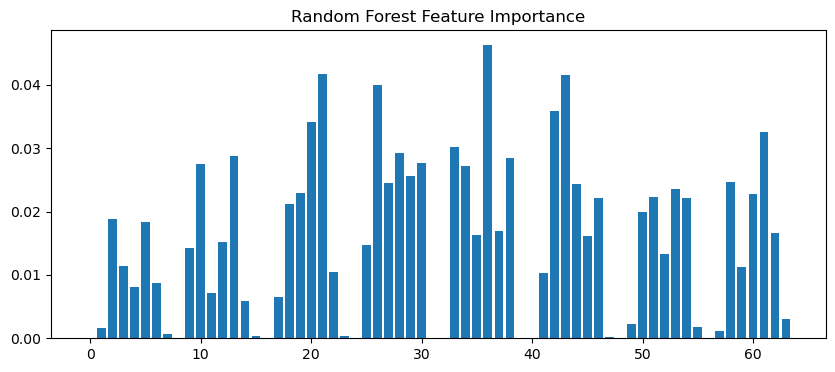

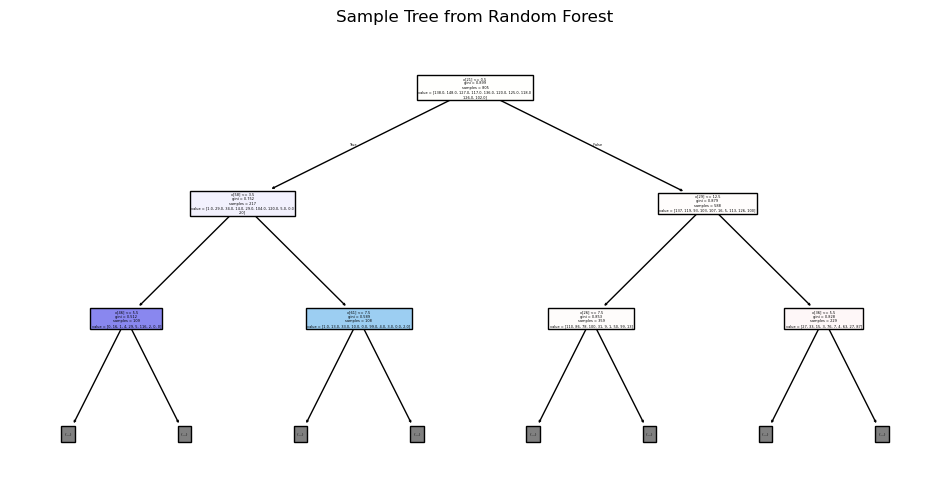


--- RF Hyperparameter Tuning ---
n_estimators=50 Accuracy: 0.9814814814814815
n_estimators=100 Accuracy: 0.9740740740740741
n_estimators=150 Accuracy: 0.975925925925926

=========== ADABOOST ===========



TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [4]:
# ==========================================================
# EXPERIMENT #7
# RANDOM FOREST (BAGGING) vs ADABOOST (BOOSTING)
# DIGIT RECOGNITION — FEATURE IMPORTANCE
# ==========================================================

# ================= IMPORT LIBRARIES =================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_digits
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV
)
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# ==========================================================
# LOAD DATASET — DIGITS
# ==========================================================

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# ==========================================================
# PART A — RANDOM FOREST (BAGGING)
# ==========================================================

print("\n=========== RANDOM FOREST ===========\n")

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

start = time.time()
rf.fit(X_train, y_train)
rf_train_time = time.time() - start

rf_pred = rf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, rf_pred))
print("OOB Score :", rf.oob_score_)

# ---------- FEATURE IMPORTANCE ----------
importances = rf.feature_importances_

plt.figure(figsize=(10,4))
plt.bar(range(len(importances)), importances)
plt.title("Random Forest Feature Importance")
plt.show()

# ---------- VISUALIZE ONE TREE ----------
plt.figure(figsize=(12,6))
plot_tree(
    rf.estimators_[0],
    max_depth=2,
    filled=True
)
plt.title("Sample Tree from Random Forest")
plt.show()

# ==========================================================
# PARAMETER TUNING — RF
# ==========================================================

print("\n--- RF Hyperparameter Tuning ---")

for n in [50, 100, 150]:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    print(f"n_estimators={n} Accuracy:",
          model.score(X_test, y_test))

# ==========================================================
# PART B — ADABOOST (BOOSTING)
# ==========================================================

print("\n=========== ADABOOST ===========\n")

ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

start = time.time()
ada.fit(X_train, y_train)
ada_train_time = time.time() - start

ada_pred = ada.predict(X_test)

print("Accuracy :", accuracy_score(y_test, ada_pred))

# ---------- ERROR vs ESTIMATORS ----------
errors = []

for i in range(1, 101):
    temp = AdaBoostClassifier(n_estimators=i)
    temp.fit(X_train, y_train)
    pred = temp.predict(X_test)
    errors.append(1 - accuracy_score(y_test, pred))

plt.plot(range(1,101), errors)
plt.title("Error Rate vs Estimators")
plt.xlabel("Estimators")
plt.ylabel("Error")
plt.show()

# ==========================================================
# SAMPLE WEIGHT ANALYSIS
# ==========================================================

print("\nSample Weights (First 10):")
print(ada.estimator_weights_[:10])

# ==========================================================
# PART C — COMPARISON
# ==========================================================

print("\n=========== PERFORMANCE COMPARISON ===========\n")

# Prediction Time
start = time.time()
rf.predict(X_test)
rf_pred_time = time.time() - start

start = time.time()
ada.predict(X_test)
ada_pred_time = time.time() - start

print("Random Forest Accuracy :", accuracy_score(y_test, rf_pred))
print("AdaBoost Accuracy :", accuracy_score(y_test, ada_pred))

print("\nTraining Time")
print("RF :", rf_train_time)
print("Ada :", ada_train_time)

print("\nPrediction Time")
print("RF :", rf_pred_time)
print("Ada :", ada_pred_time)

# ==========================================================
# PERFORMANCE TABLE
# ==========================================================

results = pd.DataFrame({
    "Model": ["Random Forest", "AdaBoost"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, ada_pred)
    ],
    "Train Time": [rf_train_time, ada_train_time],
    "Predict Time": [rf_pred_time, ada_pred_time]
})

print("\nPerformance Table:\n")
print(results)

# ==========================================================
# POST-LAB EXTENSIONS
# ==========================================================

print("\n=========== GRADIENT BOOSTING ===========\n")

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

print("Gradient Boosting Accuracy :",
      gb.score(X_test, y_test))

# ==========================================================

print("\n=========== STACKING ENSEMBLE ===========\n")

stack = StackingClassifier(
    estimators=[
        ("rf", rf),
        ("ada", ada)
    ],
    final_estimator=DecisionTreeClassifier()
)

stack.fit(X_train, y_train)

print("Stacking Accuracy :",
      stack.score(X_test, y_test))

# ==========================================================

print("\n=========== RANDOMIZED SEARCH ===========\n")

param_dist = {
    "n_estimators": [50,100,150],
    "max_depth": [5,10,15]
}

search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_dist,
    n_iter=5,
    cv=3
)

search.fit(X_train, y_train)

print("Best Params :", search.best_params_)
print("Best Score :", search.best_score_)

# ==========================================================
# BOOTSTRAP EFFECT
# ==========================================================

print("\n=========== BOOTSTRAP EFFECT ===========\n")

rf_boot = RandomForestClassifier(bootstrap=True)
rf_no_boot = RandomForestClassifier(bootstrap=False)

rf_boot.fit(X_train, y_train)
rf_no_boot.fit(X_train, y_train)

print("With Bootstrap :",
      rf_boot.score(X_test, y_test))

print("Without Bootstrap :",
      rf_no_boot.score(X_test, y_test))

# ==========================================================
# FEATURE IMPORTANCE COMPARISON
# ==========================================================

plt.figure(figsize=(10,4))
plt.bar(range(len(importances)),
        rf.feature_importances_,
        label="RF")

plt.bar(range(len(importances)),
        gb.feature_importances_,
        alpha=0.5,
        label="GB")

plt.title("Feature Importance Comparison")
plt.legend()
plt.show()

# ==========================================================
print("\n======= EXPERIMENT #7 COMPLETED SUCCESSFULLY =======")
